In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from scipy import stats
sns.set()

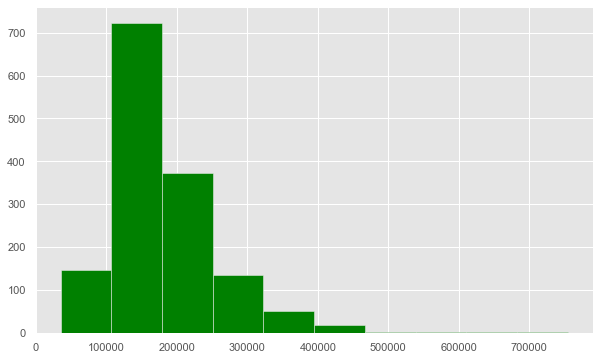

1.8828757597682129

In [2]:
train = pd.read_csv('C:\\Users\\sm\\Documents\\Data science\\Examples\\kaggle\\house-prices-advanced-regression-techniques\\train.csv')
test = pd.read_csv('C:\\Users\\sm\\Documents\\Data science\\Examples\\kaggle\\house-prices-advanced-regression-techniques\\test.csv')
plt.style.use(style = 'ggplot')
plt.rcParams['figure.figsize'] = (10,6)
plt.hist(train.SalePrice, color='green')
plt.show()
train.SalePrice.skew()


skew is:   0.12133506220520406


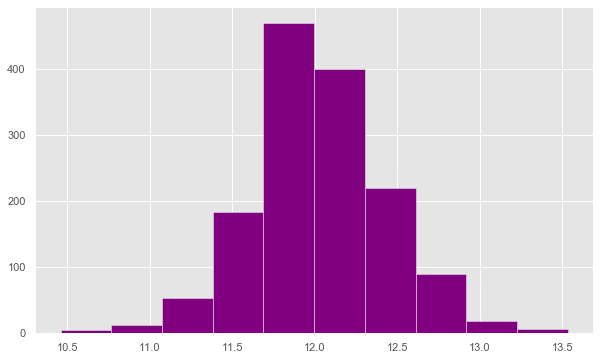

In [4]:
# Distribution is positively skewed. when performing regression, sometimes it makes sense to log-transform the target variable. 
# One reason for this is to improve the linearity of the data.
target = np.log(train.SalePrice)
print("skew is:  ",target.skew())
plt.hist(target, color = 'purple')
plt.show()


A value closer to 0 means that we have improved the skewness of the data. Now, we can see there is a normal distribution.

## Feature Engineering

In [ ]:
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print(corr['SalePrice'].sort_values(ascending=False)[:5])
print(corr['SalePrice'].sort_values(ascending=False)[-5:])


The first five features are the most positively correlated with SalePrice, while the next five are the most negatively correlated.

Int64Index([523, 1298], dtype='int64')


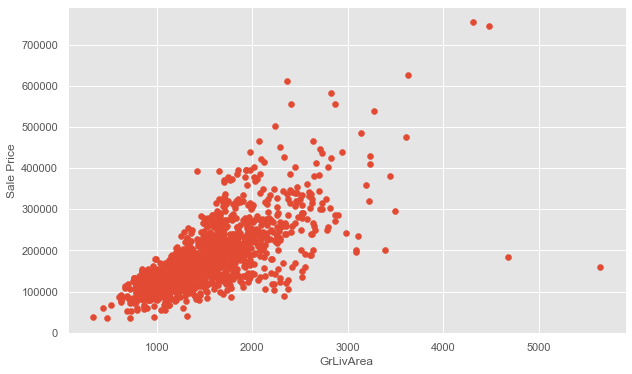

In [14]:

plt.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('GrLivArea')
plt.show()

In [20]:
train.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [21]:
cate = train.select_dtypes(include=[np.number])
cate.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


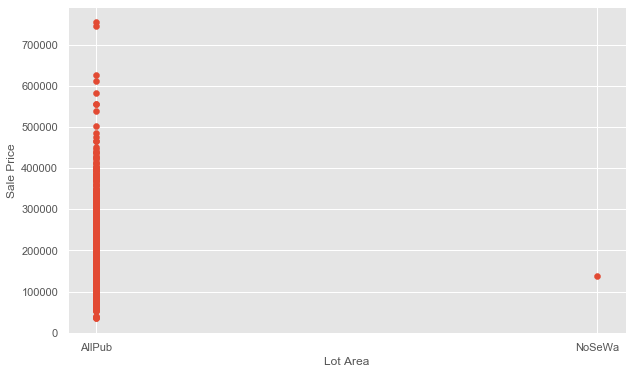

In [218]:
plt.scatter(train['Utilities'], train['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Lot Area')
plt.show()

## Removing outliers

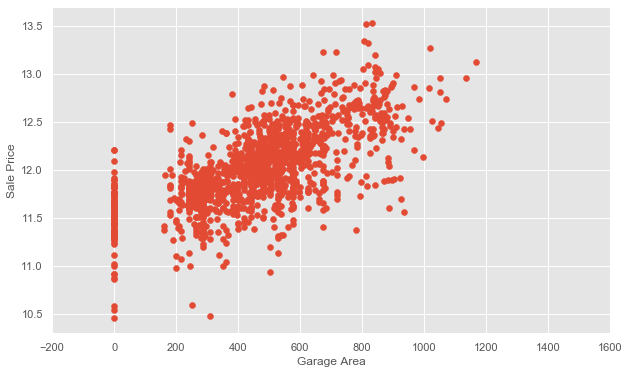

In [22]:
train = train[train['GarageArea'] < 1200]

plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()


## Handling Null Values

In [116]:
train.FireplaceQu .value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [87]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null COUNT']
nulls.index.name = 'Feature'
print(nulls)

              Null COUNT
Feature                 
PoolQC              1453
MiscFeature         1406
Alley               1369
Fence               1179
FireplaceQu          690
LotFrontage          259
GarageCond            81
GarageType            81
GarageYrBlt           81
GarageFinish          81
GarageQual            81
BsmtExposure          38
BsmtFinType2          38
BsmtFinType1          37
BsmtCond              37
BsmtQual              37
MasVnrArea             8
MasVnrType             8
Electrical             1
Utilities              0
YearRemodAdd           0
MSSubClass             0
Foundation             0
ExterCond              0
ExterQual              0


## Wrangling the Non-Numeric Features

In [ ]:
categoricals = train.select_dtypes(exclude=[np.number])
print(categoricals.describe())

## Transforming Features
For many of thes features, we might want to use one-hot encoding to make use of the information for modeling.
### One-hot encoding
It is a technique which will transform categorical data in to numbers so the model can understand whether or not a particular
observation falls into one catefory or another.

When transforming features, its important to remember that any transformation that you have applied to the training data before 
fitting the model must be applied to the test data.

In [ ]:
print(train.Street.value_counts())

In the Street column, the unique values are Pave and Grvl, which describe the type of road access to the property.
This model needs numerical data, so i have used one-hot encoding to transform the data ino a boolean column.

Create a new column called enc_street. The pd.get_dummies() method will be used for this.
AS mentioned earlier, I need to do this on both the train and test data.

In [23]:

train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(test.Street, drop_first=True)

print(train.enc_street.value_counts())

1    1450
0       5
Name: enc_street, dtype: int64


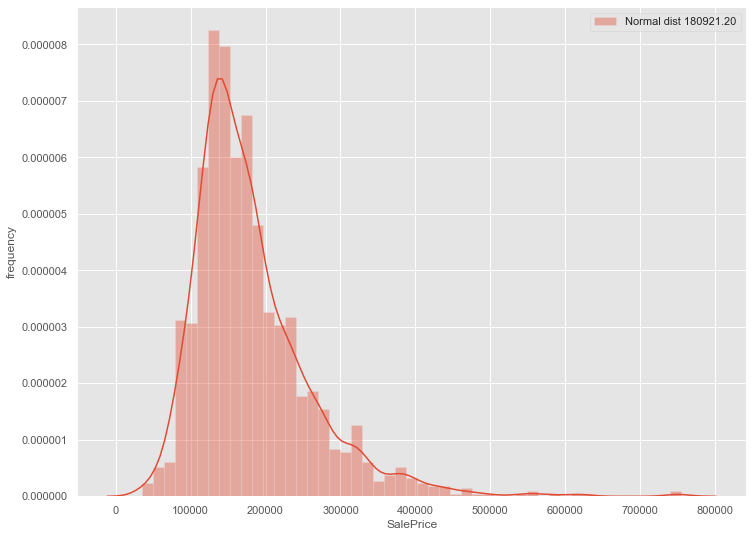

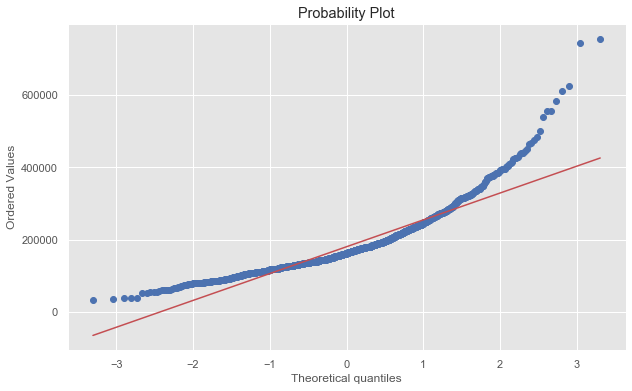

In [5]:
plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'])
(mu, sigma)= stats.norm.fit(train['SalePrice'])
plt.legend(['Normal dist {:.2f}'.format(mu, sigma)],loc='best' )
plt.ylabel('frequency')
fig=plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [98]:
categorical_train = train.select_dtypes(exclude=[np.number])
categorical_test = test.select_dtypes(exclude=[np.number])
train1 = pd.get_dummies(categorical_train, drop_first=True)
train[train1.columns] = train1
test1 = pd.get_dummies(categorical_test, drop_first=True)
test[test1.columns] = test1
train=train.drop(columns=categorical_train.columns)
test=test.drop(columns=categorical_test.columns)


ValueError: No objects to concatenate

In [107]:
train.columns[210:]

Index(['GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd', 'GarageFinish_RFn', 'GarageFinish_Unf',
       'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA',
       'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA',
       'PavedDrive_P', 'PavedDrive_Y', 'PoolQC_Fa', 'PoolQC_Gd', 'Fence_GdWo',
       'Fence_MnPrv', 'Fence_MnWw', 'MiscFeature_Othr', 'MiscFeature_Shed',
       'MiscFeature_TenC', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD',
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object')

In [ ]:
condition_pivot = train.pivot_table(index = 'SaleCondition', values= 'SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()


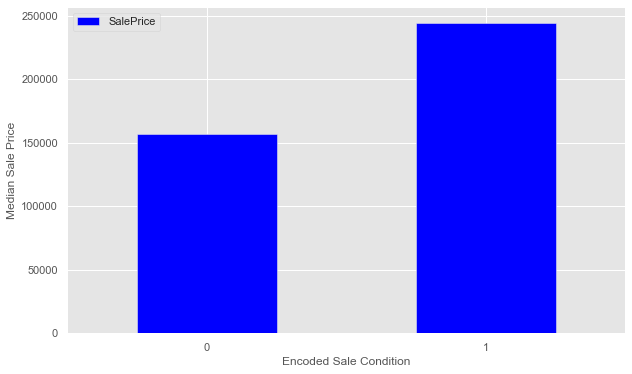

In [203]:
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

condition_pivot = train.pivot_table(index = 'enc_condition', values= 'SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()


In [53]:
train.isnull().sum().sort_values(ascending=False)[:25]

LotFrontage              259
GarageYrBlt               81
MasVnrArea                 8
Neighborhood_Veenker       0
Condition1_Feedr           0
Condition1_Norm            0
Condition1_PosA            0
Condition1_PosN            0
Condition1_RRAe            0
SaleCondition_Partial      0
Neighborhood_StoneBr       0
Condition1_RRAn            0
Condition1_RRNe            0
Condition1_RRNn            0
Condition2_Feedr           0
Condition2_Norm            0
Neighborhood_Timber        0
Neighborhood_SawyerW       0
Neighborhood_Somerst       0
Condition2_PosN            0
Neighborhood_Sawyer        0
Neighborhood_SWISU         0
Neighborhood_OldTown       0
Neighborhood_NridgHt       0
Neighborhood_NoRidge       0
dtype: int64

## Dealing with Missing Values
Filling missing values with an average value and then assign the results to data. This is a method of interpolation.

In [54]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

print(sum(data.isnull().sum() !=0))


0


## Build a Linear Model

In [84]:
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

reg = LinearRegression()
model = reg.fit(X_train, y_train)
print("Rsquared is : ", model.score(X_test, y_test))
v= np.array(X_test)
print(np.exp(model.predict(v[-1].reshape(1,-1))))
print(np.exp(y_test))

Rsquared is :  0.7936341602928758
[185195.56087117]
892     154500.0
1105    325000.0
413     115000.0
522     159000.0
1036    315500.0
          ...   
1010    135000.0
390     119000.0
1409    215000.0
847     133500.0
1284    169000.0
Name: SalePrice, Length: 482, dtype: float64


In [74]:
prediction = model.predict(X_test)
print("RMSE is : ", mean_squared_error(y_test, prediction))

RMSE is :  0.03517121553021984


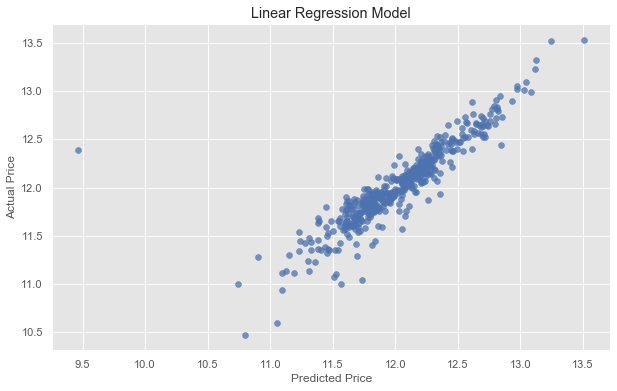

In [57]:
actual_values = y_test
plt.scatter(prediction, actual_values, alpha=.75, color='b') # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

## Ridge regulation

In [ ]:
for i in range(-2,3):
    alpha = 10^i
    rm= linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b') # alpha helps to show overlapping data
    plt.xlabel('Predicted ridge')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regulation with alpha = {}'.format(alpha))
    overlay = 'Rsquared is : {}'.format(ridge_model.score(X_test, y_test), mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6), size='x-large')
    plt.show()


In [195]:
submission = pd.DataFrame()
submission['Id'] = test.Id

feats = test.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()
prediction = model.predict(feats)
final_predictions = np.exp(prediction)

submission['SalePrice'] = final_predictions

submission.to_csv('submission1.csv', index=False)